# Project Progress Report

## Project introduction
With the increase in media attention on flight accidents and airplane issues this past year, we wanted to study whether the increase in media coverage is due to heightened scrutiny or a true rise in incidents. With over 45,000 flights being handled by the Federal Aviation Agency (FAA0 daily and over 2.9 million passengers, people expect to feel safe and secure when boarding their flights. Aviation is statistically one of the safest modes of transportation, but recent news has influenced general feelings regarding air travel. This leads us to ask: **Is the rise in media attention due to a real increase in aviation incidents, or is it a result of heightened scrutiny and reporting?**

To study flight accident and incident trends, we found data from the National Transportation and Security Board (NTSB). The NTSB provides data for each month with data information on each accident reported. 
The dataset includes a wide range of variables, such as:
Number and type of injuries
Probable cause of the incident
Geographic coordinates (latitude and longitude)
Aircraft make and model
Operator
Weather conditions at the time of the event
Extent of aircraft damage
Phase of flight (takeoff, cruise, landing, etc.)
By analyzing trends across these variables, we aim to determine whether the rate of flight incidents has actually increased or if the perception of danger is being amplified by media coverage. Our goal is to provide data-driven insight into the current state of aviation safety and help distinguish between perception and reality.

Link to our Jupyter Notebook on GitHub Repository: 
[Link](https://github.com/navdeepnatt41/418-Group_Project/blob/main/ProgressReport/ProgressReport-1.ipynb)


## Changes since proposal

Given that the dataset only included incident reports, we quickly recognized the limitations in assessing the prevalence of social media-related incidents or comparing flights that had incidents compared to flights that did not result in an incident. As a result, we narrowed the scope of our analysis. Instead, we focused on identifying potential factors that may increase the likelihood of an incident occurring.

## Data

We attempted to download a JSON/CSV file with the data over a 10-year period, however after doing so we quickly realized that a lot of information relevant to our project was missing due to how NTSB had compiled the data over the 10-year period. We decided to download the data over each year and then with Pandas, we were able to merge each year together into one dataframe to get 10 years worth of data . By doing so, we ensured that all the data that we were seeing in the a month CSV file would also be in the 10-year CSV without any missing columns.

In [1]:
pip install seaborn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip3.10 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
# take in the downloaded csv data over a 10-year period and merge it into one database
# export the database to a CSV for the rest of the group to download 
db15 = pd.read_csv('2015.csv')
db16 = pd.read_csv('2016.csv')
db17 = pd.read_csv('2017.csv')
db18 = pd.read_csv('2018.csv')
db19 = pd.read_csv('2019.csv')
db20 = pd.read_csv('2020.csv')
db21 = pd.read_csv('2021.csv')
db22 = pd.read_csv('2022.csv')
db23 = pd.read_csv('2023.csv')
db24 = pd.read_csv('2024.csv')
db25 = pd.read_csv('2025.csv')
# concatenating the data over each year into one dataframe 
frames = [db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25]
mergedResults = pd.concat(frames)
# merging the results into a CSV 
mergedResults.to_csv('Merged10yrdata.csv', index=False)

## Explatory Data Analysis

For our Explatory Data Analysis, we all came up with 3 different visualization ideas then came together to choose 1 to work on for the time being. 
The following were chosen and are included in this report: 

Angela: Create a visualization that compares Makes of planes and the broad phase of flight (approach, initial climb, landing) [STACKED BAR CHART]

Nav: Plot accident data over a set of years with respect to location. We could plot accident points on an Earth map and also study which regions comparatively got the most accidents over time [SCATTERPLOT]

Oli: Time between accident date and report publication with a heatmap or bar chart visualization to identify if reports are being published more quickly in recent years, potentially indicating that there is increased scrutiny. [HEATMAP]

Lora: Line graph of number of flight incidents over time. Use separate lines for fatalities, non fatal injuries, and non-injuries [LINE GRAPH]

Yesui: Flight operator (company) vs. number of accidents (look at number of accidents per operator over total number) [BAR CHART]

### Angela's Visualization

Angela began by creating a visualization to examine which phases of flight—such as takeoff, en route, and landing—were most frequently associated with incidents. The initial analysis focused on five aircraft manufacturers and revealed a notably higher incident rate during the landing phase for Cessna and Piper aircraft. Upon further investigation, it became clear that these two companies primarily produce smaller, general aviation aircraft used for personal, private, and business purposes. Since the original hypothesis was centered on commercial aviation, Angela refined her analysis by narrowing the focus to Boeing and Airbus, the two leading commercial aircraft manufacturers.

The updated visualization revealed that for Boeing and Airbus aircraft, incidents were more likely to occur during landing and en route. This pattern raised questions about contributing factors, such as prior damage to the aircraft, inconsistent maintenance routines, weather conditions, bird strikes, or even human error. These findings suggest that while the phase of flight is a key variable, a deeper exploration into other factors is needed to fully understand the causes of these incidents. 


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'landing'),
  Text(1, 0, 'enroute'),
  Text(2, 0, 'takeoff'),
  Text(3, 0, 'approach'),
  Text(4, 0, 'initial climb'),
  Text(5, 0, 'maneuvering'),
  Text(6, 0, 'taxi'),
  Text(7, 0, 'standing'),
  Text(8, 0, 'unknown'),
  Text(9, 0, 'emergency descent'),
  Text(10, 0, 'uncontrolled descent'),
  Text(11, 0, 'pushback/tow'),
  Text(12, 0, 'after landing'),
  Text(13, 0, 'post-impact')])

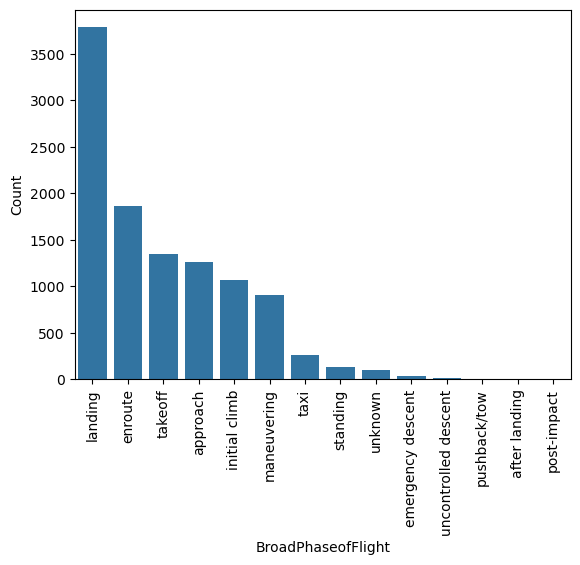

In [3]:
#Create a visualization that compares Makes of planes  and the broad phase of flight (approach, initial climb, landing) [STACKED BAR CHART]

# cleaning up the data 
sortedDB = pd.read_csv('Merged10yrdata.csv', low_memory=False)
sortedDB['Make'] = sortedDB['Make'].str.lower()
sortedDB['BroadPhaseofFlight'] = sortedDB['BroadPhaseofFlight'].str.lower()
# sort out incidents that only occurred in the US and are categorized as AIR
filteredOutCountry = sortedDB[(sortedDB['Country'] == 'United States') & (sortedDB['AirCraftCategory'] == 'AIR')]
# group by make and phase of flight 
results = filteredOutCountry[['EventDate','Make', 'BroadPhaseofFlight']].groupby(['Make', 'BroadPhaseofFlight']).count().reset_index()
# rename columns
results = results.rename(columns={'EventDate': 'Count'})
# results.to_csv('results.csv', index=False) 

sumByPhase = results.groupby('BroadPhaseofFlight')['Count'].sum().reset_index()

sumByPhase = sumByPhase.sort_values(by='Count', ascending=False)
# print(sumByPhase)

plot = sns.barplot(x='BroadPhaseofFlight', y='Count', data= sumByPhase)
plt.xticks(rotation=90)
#plt.show()

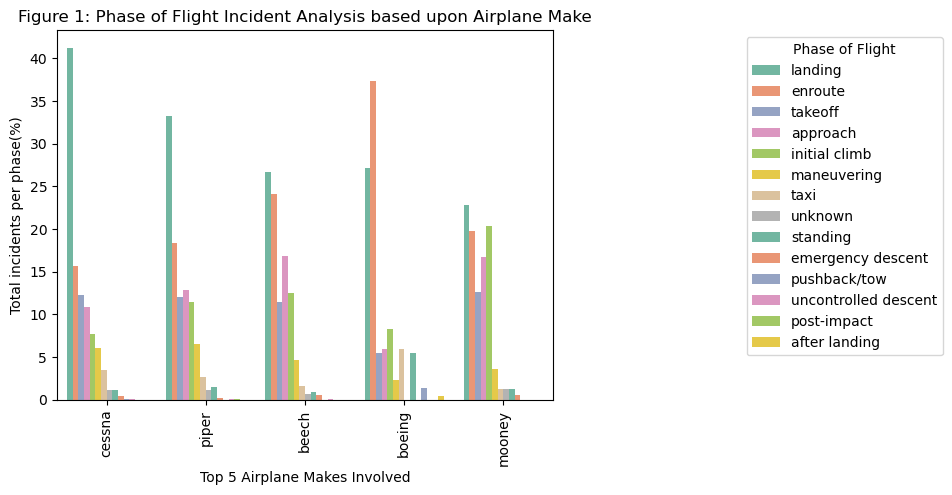

In [4]:
# getting the total count of flights by make 
sumByMake = results.groupby(['Make','BroadPhaseofFlight'])['Count'].sum().reset_index()

sumByMake = sumByMake.sort_values(by='Count', ascending=False)
# calculating the sum of each make 
totalSum = sumByMake.groupby('Make')['Count'].sum().reset_index()
# sorting and column renaming 
totalSum = totalSum.sort_values(by='Count', ascending=False)
totalSum = totalSum.rename(columns={'Count': 'Total'})
sumByMake = sumByMake.merge(totalSum, on='Make')
# calculating the percentage of each phase 
sumByMake['Percent'] = (sumByMake['Count']/ sumByMake['Total']) *100
#print(sumByMake)
# to visually display the data correctly getting the top 5 makes that are represented in the data 
top_makes = sumByMake.groupby('Make')['Count'].sum().nlargest(5).index
top5 = sumByMake[sumByMake['Make'].isin(top_makes)]

#print(top5)
# creating the bar plot and setting the axis' labels and title
plot = sns.barplot(x='Make', y='Percent', hue='BroadPhaseofFlight', data=top5, palette='Set2')
plot.set_xlabel("Top 5 Airplane Makes Involved")
plot.set_ylabel("Total incidents per phase(%)")
plot.set_title("Figure 1: Phase of Flight Incident Analysis based upon Airplane Make")
plt.xticks(rotation=90)
plt.legend(title="Phase of Flight", loc= 'upper right', bbox_to_anchor=(1.8, 1))
plt.show()

/var/folders/59/c330ddnn04zgqhmz_z7202540000gn/T/ipykernel_86717/1661091794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial['Make'] = commercial['Make'].str.split().str[0]
/var/folders/59/c330ddnn04zgqhmz_z7202540000gn/T/ipykernel_86717/1661091794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial['Make'] = commercial['Make'].str.split('-').str[0]


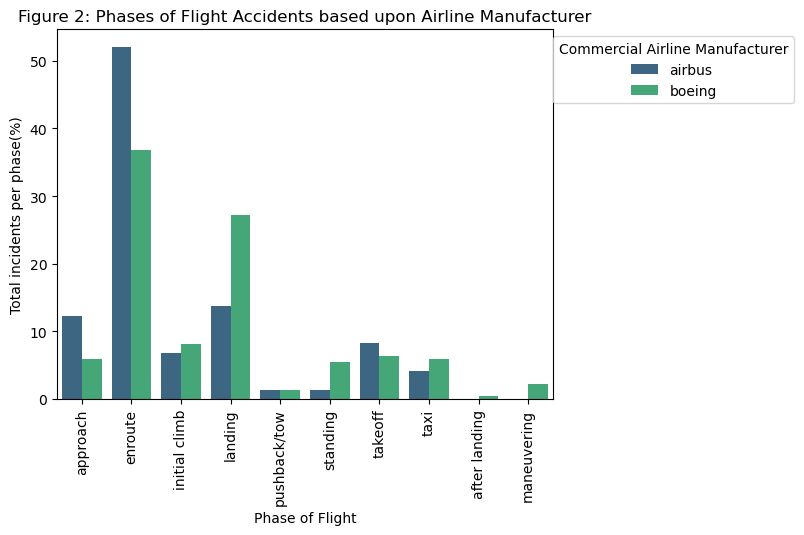

In [5]:
# since our term project only focuses on commercial airlines, I narrowed down data reflecting commercial flights which are Boeing and Airbus
commercial = results[results['Make'].str.contains('Boeing|Airbus', case=False, na=False)]
# including the data that may contain hypenated airline makes 
commercial['Make'] = commercial['Make'].str.split().str[0]
commercial['Make'] = commercial['Make'].str.split('-').str[0]
# print(commercial)
# getting a sum which is grouped by the make 
sumByMake = commercial.groupby(['Make','BroadPhaseofFlight'])['Count'].sum().reset_index()

# sumByMake = sumByMake.sort_values(by='Count', ascending=False)
# getting a total sum to calculate the percentage 
totalSum = sumByMake.groupby('Make')['Count'].sum().reset_index()
# renaming columns 
totalSum = totalSum.rename(columns={'Count': 'Total'})
sumByMake = sumByMake.merge(totalSum, on='Make')
sumByMake['Percent'] = (sumByMake['Count']/ sumByMake['Total']) *100
#print(sumByMake)
# creating the bar plot and renamed the axis' 
plot = sns.barplot(x='BroadPhaseofFlight', y='Percent', hue='Make', data=sumByMake, palette='viridis')
plot.set_xlabel("Phase of Flight")
plot.set_ylabel("Total incidents per phase(%)")
plot.set_title("Figure 2: Phases of Flight Accidents based upon Airline Manufacturer")
plt.xticks(rotation=90)

# # 9) Customize legend if necessary
plt.legend(title="Commercial Airline Manufacturer", loc= 'upper right',  bbox_to_anchor=(1.5, 1))
plt.show()

### Yesui's Visualization

Yesui’s goal was to determine which operators had the most accidents. Given our data, first she cleaned it up by removing any lines with missing data then by cleaning up the operators. She then standardized the operator names, addressing inconsistencies such as "Delta Airlines" appearing in multiple forms (e.g., "Delta Air Lines," "Delta Airlines, Inc," etc.). By consolidating these variations into a single, consistent name, she ensured more accurate and meaningful analysis. Next, she filtered the dataset to include only the major U.S. airlines: United Airlines, American Airlines, Southwest Airlines, Delta Airlines, JetBlue Airways, Spirit Airlines, and Frontier Airlines. Based on this refined data, United Airlines appeared to have the highest number of flight incidents as a percentage of the group. However, this percentage alone doesn’t tell the full story. Understanding the total number of flights operated by each airline is crucial—an airline with more flights will naturally have more opportunities for incidents. For example, if United operates far more flights per day than Spirit, its higher incident count may reflect its volume rather than a higher rate of incidents per flight. Incorporating flight volume data would allow for a more accurate comparison of incident rates. 

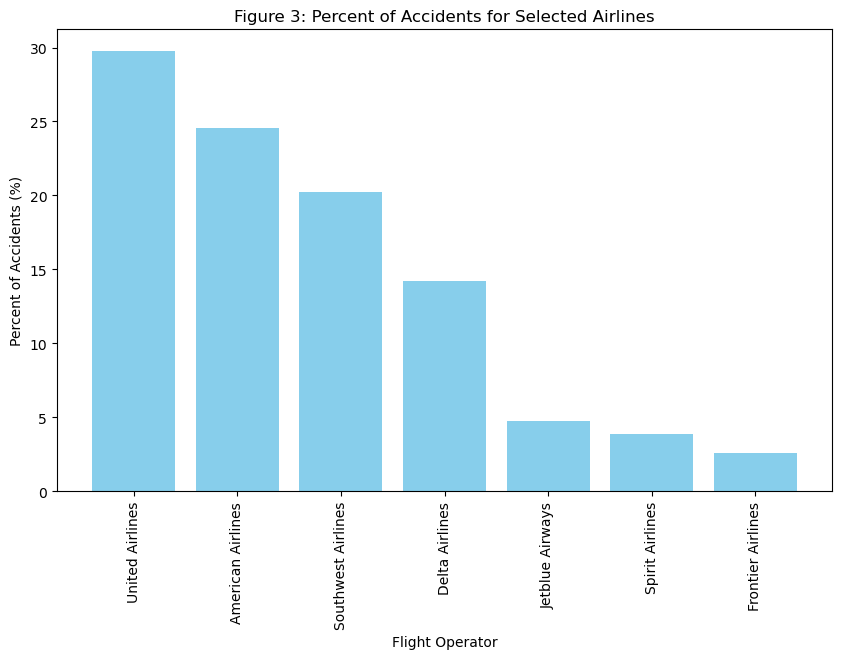

In [6]:
# Load CSV file
df = pd.read_csv('Merged10yrdata.csv', low_memory=False)

# Fill missing operator values with 'N/A' and remove them
df = df.copy()  # Ensure we're modifying the original DataFrame
df['Operator'] = df['Operator'].fillna('N/A')  # Assign explicitly instead of using inplace=True
df = df[~df['Operator'].isin(['N/A', 'Not reported', 'Unknown', 'Private', 'Private Individual', 'Pilot', 'Not Provided by Authority'])]
# Count accidents per operator
df['Operator'] = df['Operator'].str.strip()  # Removes leading/trailing whitespace
df['Operator'] = df['Operator'].str.replace('\t', '', regex=False)  # Removes tabs
df['Operator'] = df['Operator'].str.lower()  # Convert to lowercase for consistency

df['Operator'] = df['Operator'].replace({
    'united airlines': 'united airlines',
    'united airlines inc': 'united airlines',
    'united air lines inc': 'united airlines', 
    'southwest airlines co': 'southwest airlines',
    'delta air lines': 'delta airlines',
    'delta air lines inc': 'delta airlines',
    'delta air lines, inc': 'delta airlines',
    'delta airlines inc': 'delta airlines',
    'delta airlines, inc.': 'delta airlines',
    'delta airlines inc': 'delta airlines',
    'american airlines': 'american airlines',
    'american airlines inc': 'american airlines',
    'ryanair': 'ryanair',
    'ryan air': 'ryanair',
    'civil air patrol': 'civil air patrol',
    'civil air patrol inc': 'civil air patrol',
    'air methods corp': 'air methods',
    'air methods corporation': 'air methods',
    'indigo': 'indigo',
    'indigo air': 'indigo', 
    'jetblue airways': 'jetblue airways',
    'jetblue airways corp': 'jetblue airways',
    'jetblue corp': 'jetblue airways',
    'spirit airlines inc': 'spirit airlines',
    'spirit airlines': 'spirit airlines'
}, regex=True)

df['Operator'] = df['Operator'].str.title()

accident_counts = df['Operator'].value_counts()
accident_counts = accident_counts[accident_counts > 4] 

# Define the operators you want to focus on
selected_operators = ['Delta Airlines', 'American Airlines', 'Southwest Airlines', 'Frontier Airlines', 'Spirit Airlines', 'United Airlines', 'Jetblue Airways']
# Filter the data to include only the selected operators
filtered_data = df[df['Operator'].isin(selected_operators)]

# Count accidents per operator for the filtered data
select_accident_counts = filtered_data['Operator'].value_counts()

# Calculate the total number of accidents for the selected operators
total_accidents = select_accident_counts.sum()

# Calculate the percentage for each operator
select_accident_percentages = (select_accident_counts / total_accidents) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
plt.bar(select_accident_percentages.index, select_accident_percentages.values, color='skyblue')
#plt.bar(accident_counts.index, accident_counts.values, color='skyblue')
plt.xlabel('Flight Operator')
plt.ylabel('Percent of Accidents (%)')
plt.title('Figure 3: Percent of Accidents for Selected Airlines')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

### Lora's Visualization

My goal was to visualize the number of incidents for US commercial airlines over the past decade, and see whether there is an increase in incidents. In Figure 4.1, it does seem like there is an uptick in incidents that resulted in no injuries for the past couple of years. 2020 observed the lowest number of incidents, which is likely the result of the COVID-19 pandemic. 2025 shows a low number of incidents, but that is because 2025 hasn’t finished yet, so we simply don’t have the data for the rest of the year. Because of this, in Figure 4.2, I plotted the cumulative number of incidents over the first 150 days of the year to see how 2025 is doing compared to the start of previous years. For both 2024 and 2025, there does seem to be a higher than average incident count for the first 50 days of the year. Based off of these visualizations, it’s possible that there actually is an uptick in the number of incidents in recent years, but since the difference is only by 1-2 incidents, it isn’t very conclusive. 

/var/folders/59/c330ddnn04zgqhmz_z7202540000gn/T/ipykernel_86717/2111091854.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_injuries['EventDate'] = pd.to_datetime(df_injuries['EventDate'])


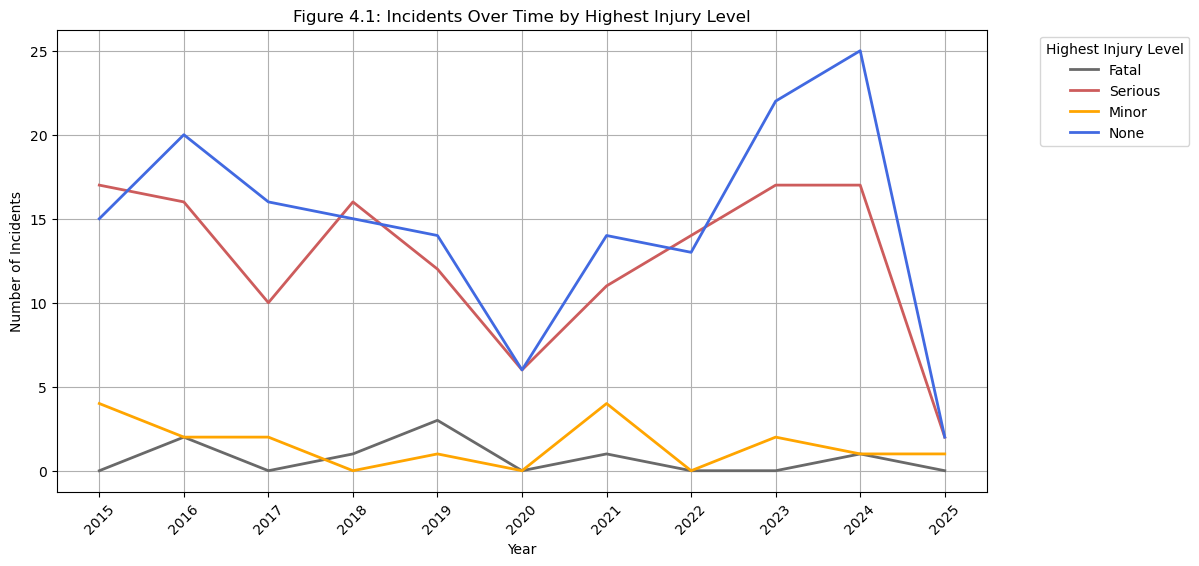

In [7]:
df = pd.read_csv('Merged10yrdata.csv', low_memory=False)
df = df[(df['Country'] == 'United States')]
commercial_makes = [
    'BOEING', 'Airbus', 'Boeing', 'AIRBUS', 
    'AIRBUS INDUSTRIE', 'BOEING, AIRBUS', 'AIRBUS SAS'
]

df['isCommercial'] = df['Make'].isin(commercial_makes)
#df

df = df[['EventDate','FatalInjuryCount', 'SeriousInjuryCount',
       'MinorInjuryCount', 'HighestInjuryLevel', 'isCommercial']]
df = df[df['isCommercial'] == True]

df['HighestInjuryLevel'] = df['HighestInjuryLevel'].fillna("None")
#df

df_injuries = df[['EventDate','FatalInjuryCount', 'SeriousInjuryCount',
       'MinorInjuryCount']]

df_injuries['EventDate'] = pd.to_datetime(df_injuries['EventDate'])
df_injuries.set_index('EventDate', inplace=True)
#df_injuries
 
df_highestInc = df
df_highestInc['EventDate'] = pd.to_datetime(df_highestInc['EventDate']) # convert event date to datetime format
df_highestInc['year'] = df_highestInc['EventDate'].dt.year # extract the year

# get cartesian groped of yearsXhighstinjurylevel so that we can fill in rows with 0 incidents
all_years = df_highestInc['year'].unique()
all_levels = df_highestInc['HighestInjuryLevel'].unique()
full_index = pd.MultiIndex.from_product([all_years, all_levels], names=['year', 'HighestInjuryLevel'])

# group by year and count number of incidents per injury level
df_highestInc_grouped = df_highestInc.groupby(['year','HighestInjuryLevel']).size().reset_index(name='incidentCount').set_index(['year', 'HighestInjuryLevel']) # group by injury level and count number of incidents
df_highestInc_grouped_full = df_highestInc_grouped.reindex(full_index, fill_value=0).reset_index()


colors = {
    'Fatal': 'dimgrey',
    'Serious': 'indianred',
    'Minor': 'orange',
    'None': 'royalblue',
}


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_highestInc_grouped_full, x='year', y='incidentCount', hue='HighestInjuryLevel', palette=colors, linewidth=2,  hue_order=['Fatal', 'Serious', 'Minor', 'None'])

plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.title("Figure 4.1: Incidents Over Time by Highest Injury Level")
plt.xticks(rotation=45) 
plt.xticks(range(2015,2026))
# plt.xlim(2015,2025)
plt.legend(title="Highest Injury Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

/var/folders/59/c330ddnn04zgqhmz_z7202540000gn/T/ipykernel_86717/1821163113.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['smoothed'] = yearly_data['cumulativeIncidents'].rolling(window=100, min_periods=1).mean()
/var/folders/59/c330ddnn04zgqhmz_z7202540000gn/T/ipykernel_86717/1821163113.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['smoothed'] = yearly_data['cumulativeIncidents'].rolling(window=100, min_periods=1).mean()
/var/folders/59/c330ddnn04zgqhmz_z7202540000gn/T

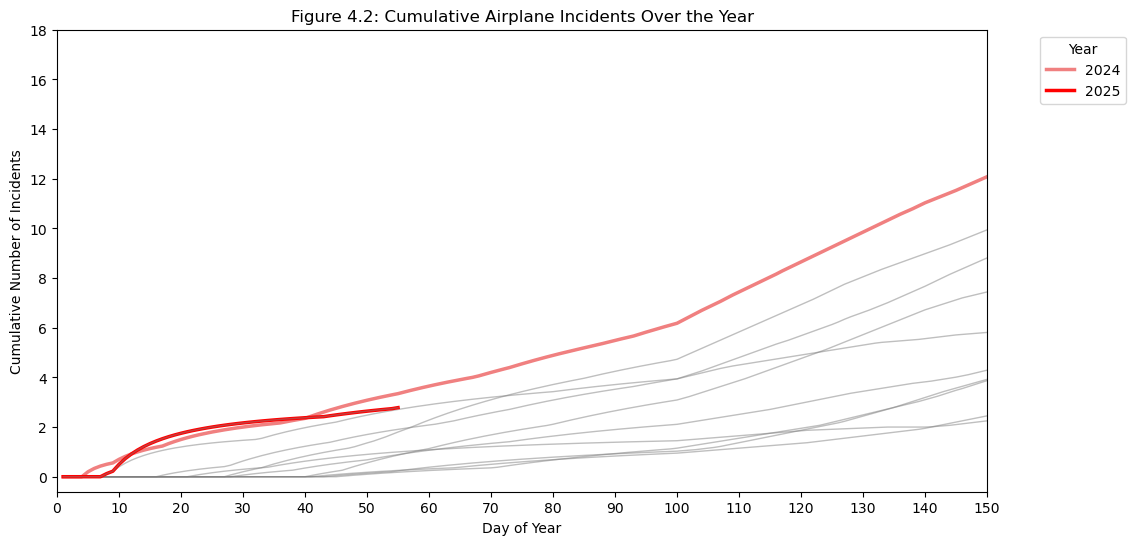

In [8]:
df_cumInc = df

df_cumInc['EventDate'] = pd.to_datetime(df['EventDate'])
df_cumInc['year'] = df['EventDate'].dt.year
df_cumInc['dayOfYear'] = df['EventDate'].dt.dayofyear

df_grouped = df_cumInc.groupby(['year','dayOfYear']).size().reset_index(name='incidentCount')
# df_grouped['cumulativeIncidents'] = df_grouped.groupby('year')['incidentCount'].cumsum()

# create an index for every (year, dayOfYear) combination
full_index = []
for year in df_grouped['year'].unique():
    max_day = 366 if pd.Timestamp(f"{year}-12-31").is_leap_year else 365
    full_index.extend([(year, day) for day in range(1, max_day + 1)])

# fill in missing days
df_full = pd.DataFrame(full_index, columns=['year', 'dayOfYear'])
df_merged = pd.merge(df_full, df_grouped, on=['year', 'dayOfYear'], how='left')
df_merged['incidentCount'] = df_merged['incidentCount'].fillna(0)

# compute cumulative incidents per year
df_merged['cumulativeIncidents'] = df_merged.groupby('year')['incidentCount'].cumsum()

df_merged
plt.figure(figsize=(12, 6))

for year in range(2015, 2026): 
    # yearly_data = df_merged[df_merged['year'] == year]

    
    yearly_data = df_merged[(df_merged['year'] == year) & (df_merged['dayOfYear'] <= 150)]
    yearly_data['smoothed'] = yearly_data['cumulativeIncidents'].rolling(window=100, min_periods=1).mean()
 
    if year == 2025:
        yearly_data = yearly_data[yearly_data['dayOfYear'] <= 55]
        plt.plot(yearly_data['dayOfYear'], yearly_data['smoothed'], label=str(year), color='red', linewidth=2.5)
    if year == 2024:
        # yearly_data = yearly_data[yearly_data['dayOfYear'] <= 55]
        plt.plot(yearly_data['dayOfYear'], yearly_data['smoothed'], label=str(year), color='lightcoral', linewidth=2.5)
    else:
        plt.plot(yearly_data['dayOfYear'], yearly_data['smoothed'], color='gray', linewidth=1, alpha=0.5)

plt.xlabel("Day of Year")
plt.ylabel("Cumulative Number of Incidents")
plt.yticks(range(0,20,2))
plt.xticks(range(0,151,10))
plt.xlim(0,150)
plt.title("Figure 4.2: Cumulative Airplane Incidents Over the Year")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left") 
# plt.grid(True)
plt.show()

### Oli's Visualization

Oli wanted to explore the hypothesis of “Reports of US aviation incidents are being published more quickly in recent years, indicating increased scrutiny.” Oli first calculated and visualized the time delay (in years) between when a US aviation incident occurred and when its official report was published. Figure 5.1 shows this, displaying how long it typically takes for reports to be published and tells us whether a lot of the reports are delayed significantly. From this figure, we see that half of the total reports filed are published within a year, exponentially decreasing with each passing year. Next, Oli grouped each report delay into bins of 120 days and grouping by event year to track how report delay distributions have changed over time. Figure 5.2 shows this in a heatmap, mostly revealing that long reporting times were steadily increasing prior to 2022 but due to lack of recent years’ reports (mainly because of the recency of the events which resulted in the large amount of unfiled data), it is hard to definitely confirm a trend of acceleration yet. Also, the jump increase in 2019’s late report filings probably had to do with the covid pandemic where many reports could have been delayed as a result but afterwards there was a speed up in report publishings, indicating an improvement. The hypothesis is therefore partially supported where there is some evidence of improvement since 2019 but the vast percentage of recent unfiled reports makes it hard to draw strong conclusions. Using a machine learning model on existing data prior to 2022 from figure 5.1 and 5.2 can help draw a better conclusion on this hypothesis (next section). 

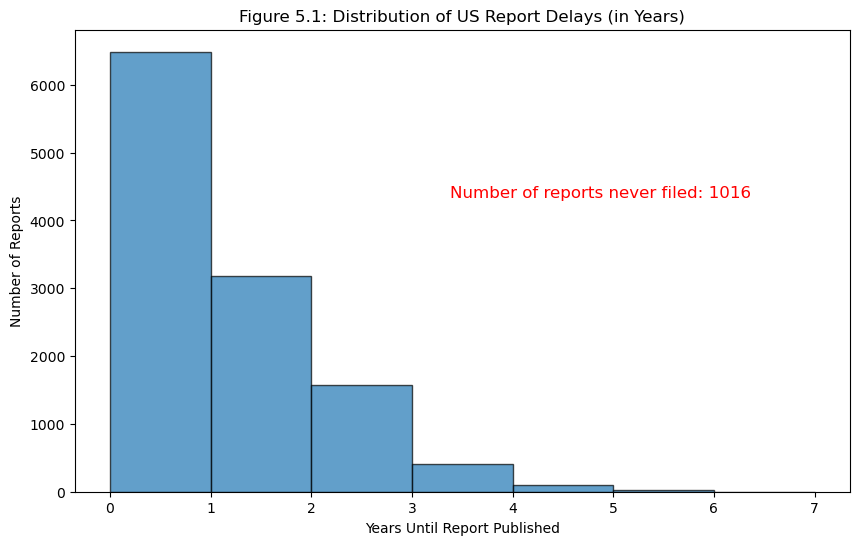

In [9]:
plane_data = pd.read_csv('Merged10yrdata.csv', low_memory=False)
event_dates = plane_data['EventDate']
publish_dates = plane_data['OriginalPublishedDate'] # OriginalPublishDate

plane_data['EventDate'] = pd.to_datetime(plane_data['EventDate'])
plane_data['OriginalPublishedDate'] = pd.to_datetime(plane_data['OriginalPublishedDate']) # OriginalPublishDate

# only want US data
plane_data = plane_data[plane_data['Country'] == 'United States']

# calculate report delays in years
plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days / 365
num_unpublished = plane_data['ReportDelay'].isna().sum()  # Count missing reports

# drop NaN values
report_delays = plane_data['ReportDelay'].dropna()

# plot
plt.figure(figsize=(10, 6))
bins = np.arange(0, report_delays.max() + 1, 1)  # Bin width of 1 year
plt.hist(report_delays, bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel("Years Until Report Published")
plt.ylabel("Number of Reports")
plt.title("Figure 5.1: Distribution of US Report Delays (in Years)")

# Add caption for unpublished reports
plt.figtext(0.50, 0.60, f"Number of reports never filed: {num_unpublished}", fontsize=12, color='red')

plt.show()

/var/folders/59/c330ddnn04zgqhmz_z7202540000gn/T/ipykernel_86717/656889864.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = plane_data.groupby([plane_data['EventDate'].dt.year, 'DelayCategory']).size().unstack()
/var/folders/59/c330ddnn04zgqhmz_z7202540000gn/T/ipykernel_86717/656889864.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = plane_data.groupby([plane_data['EventDate'].dt.year, 'DelayCategory']).size().unstack()


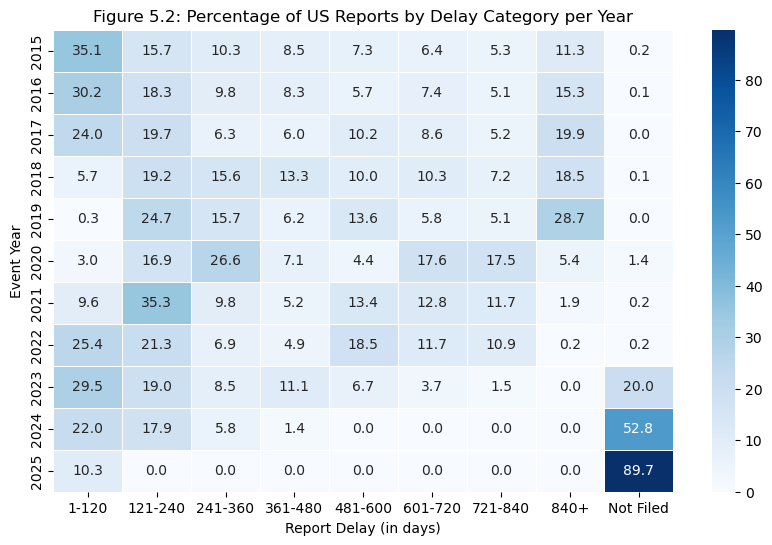

In [10]:
# calculate the delay between event and report
plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days # OriginalPublishDate

# create bins for delays
bins = [-np.inf, 120, 240, 360, 480, 600, 720, 840, np.inf]
labels = ['1-120', '121-240', '241-360', '361-480', '481-600', '601-720', '721-840', '840+']
plane_data['DelayCategory'] = pd.cut(plane_data['ReportDelay'], bins=bins, labels=labels)

# assign 'Not Filed' for missing values
plane_data['DelayCategory'] = plane_data['DelayCategory'].cat.add_categories(['Not Filed']).fillna('Not Filed')

# group by event year and delay category
heatmap_data = plane_data.groupby([plane_data['EventDate'].dt.year, 'DelayCategory']).size().unstack()

bins = [-np.inf, 120, 240, 360, 480, 600, 720, 840, np.inf]
labels = ['1-120', '121-240', '241-360', '361-480', '481-600', '601-720', '721-840', '840+']
plane_data['DelayCategory'] = pd.cut(plane_data['ReportDelay'], bins=bins, labels=labels)

# assign 'Not Filed' for missing values
plane_data['DelayCategory'] = plane_data['DelayCategory'].cat.add_categories(['Not Filed']).fillna('Not Filed')

# group by event year and delay category
heatmap_data = plane_data.groupby([plane_data['EventDate'].dt.year, 'DelayCategory']).size().unstack()

# calculate by percentage
heatmap_data_percentage = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

heatmap_data_percentage

# resize
plt.figure(figsize=(10, 6))

# create heatmap
sns.heatmap(heatmap_data_percentage, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5)

# labels and title
plt.xlabel("Report Delay (in days)")
plt.ylabel("Event Year")
plt.title("Figure 5.2: Percentage of US Reports by Delay Category per Year")

# plot
plt.show()

### Nav's Visualization



My Visualization aimed at getting a broad sense of where accidents are occuring and sensing whether we can attribute accidents to location. When plotting, however, we find that the USA and Europe have the most accidents. A basic analysis might suggest that accidents occur most over these regions due to some intrincsic factor to the USA; this might be the case due to how much traffic the US gets. The same is true for Europe; these regions are the main Economic, Tourist, and otherwise main hubs of the world.

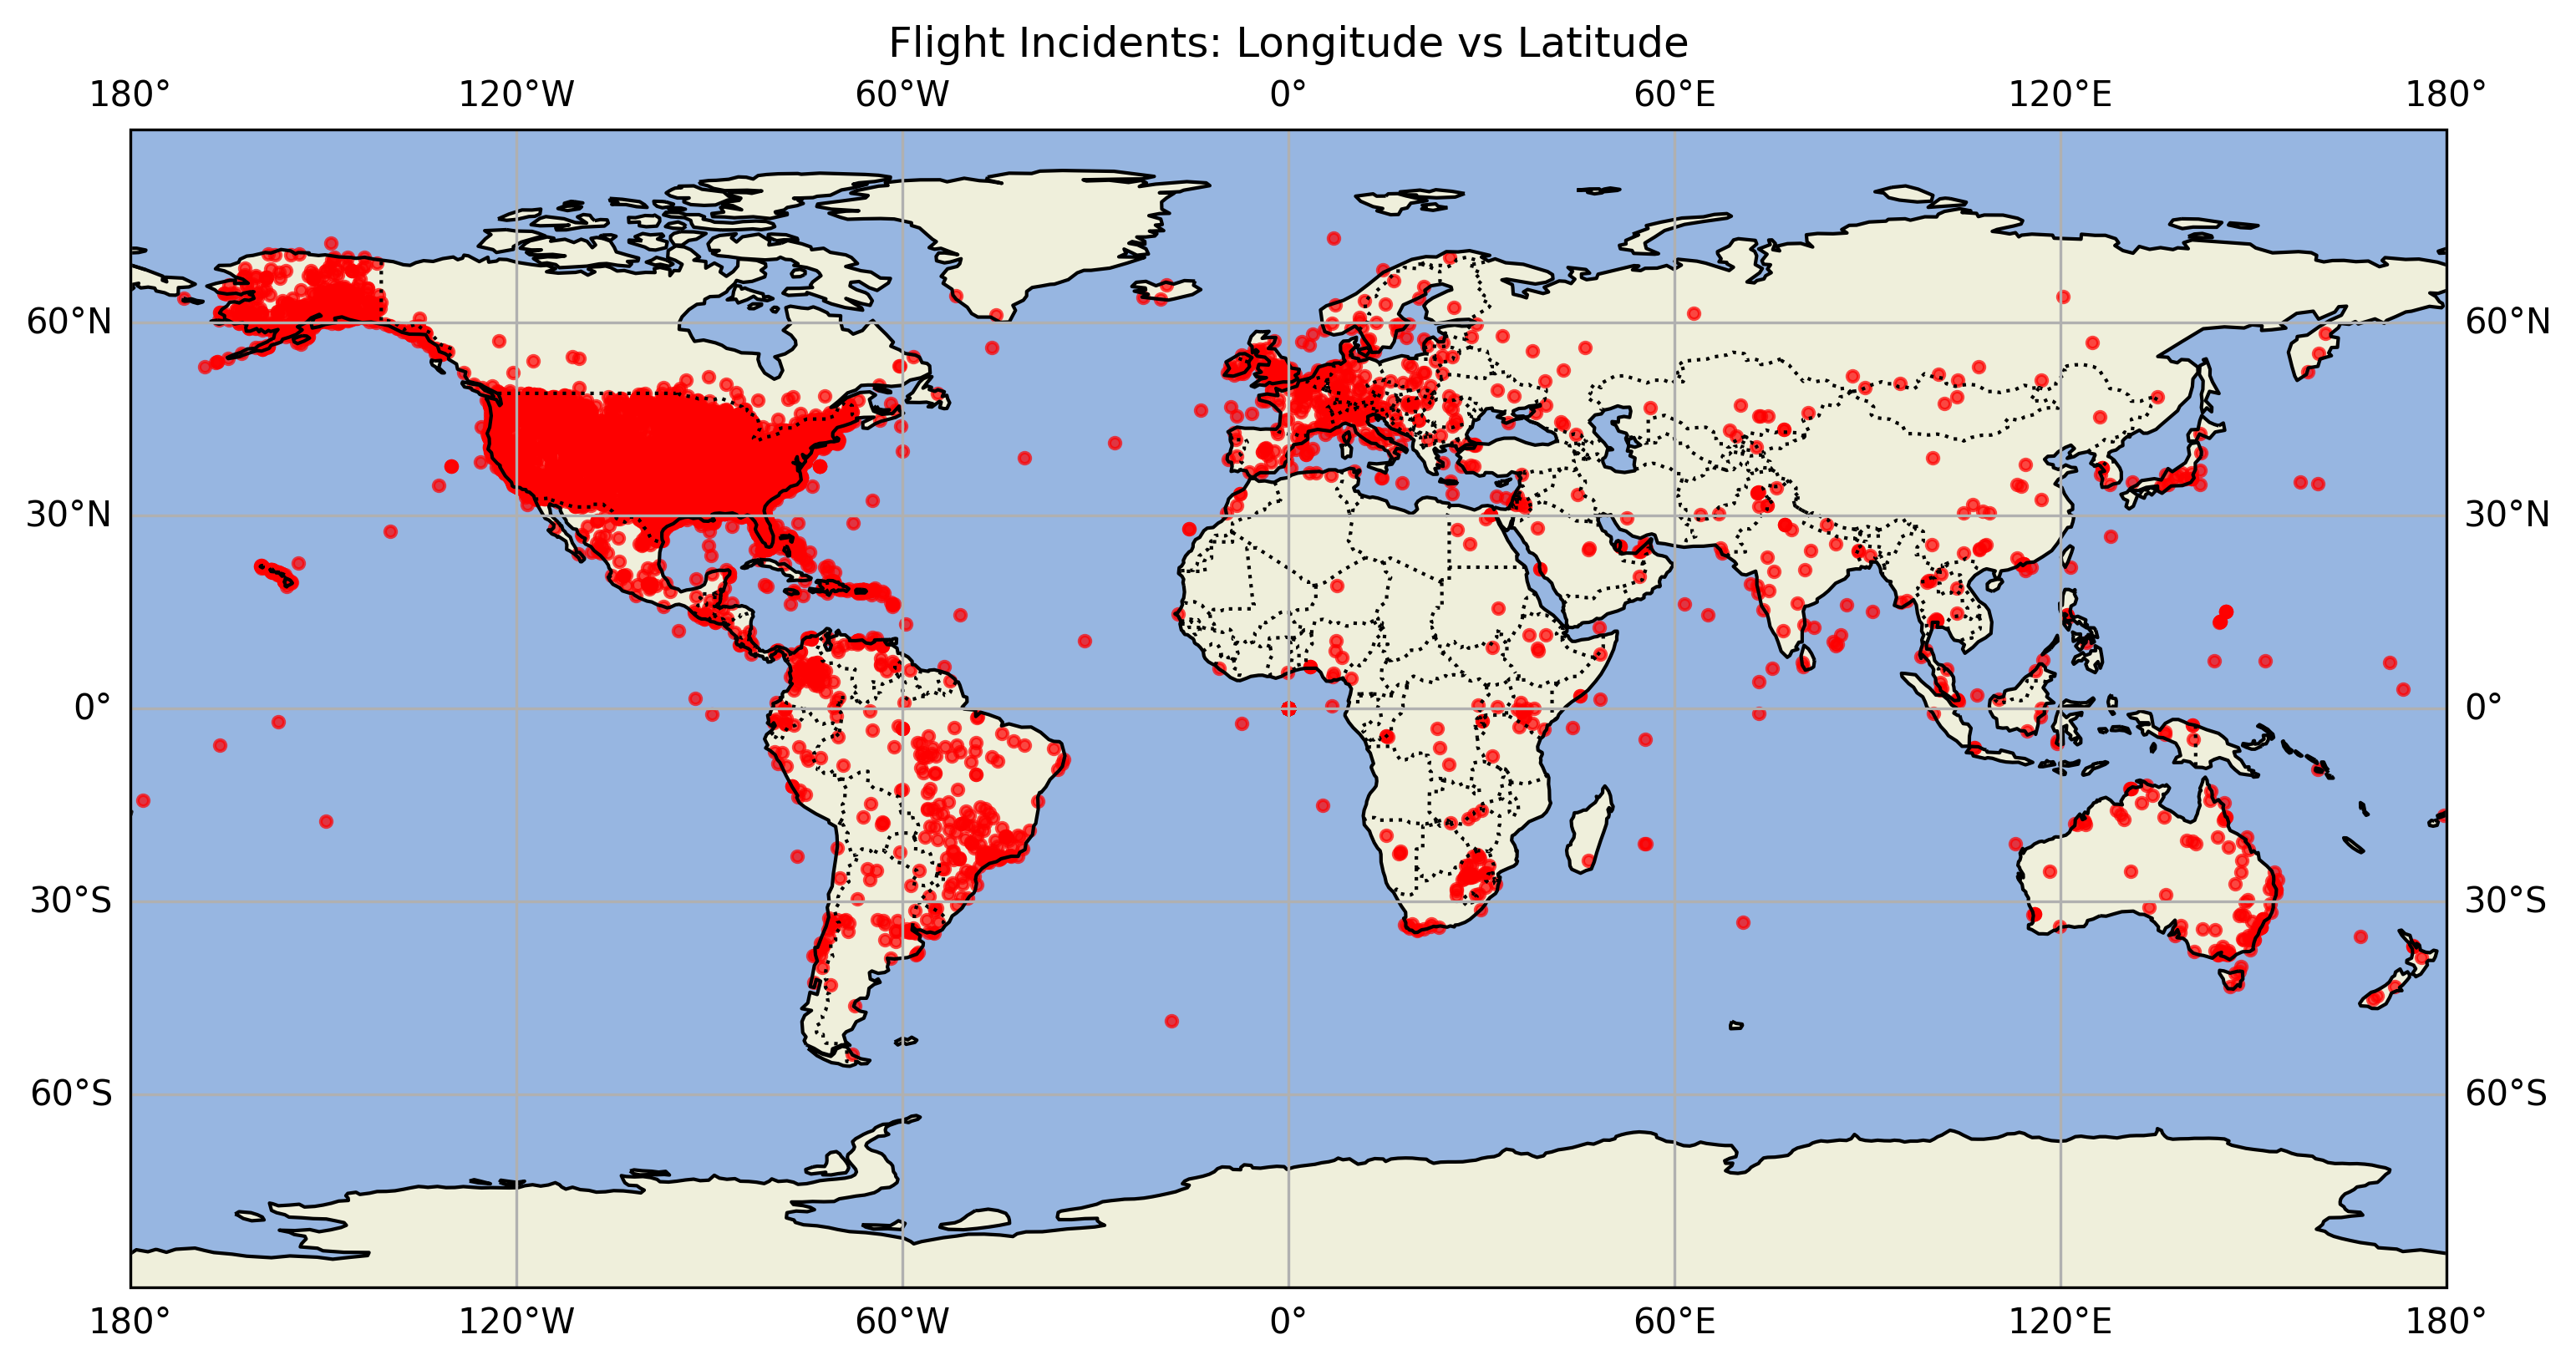

In [12]:
#CODE HAS NOT BEEN PROVIDED BY NAV FOR THIS VISUALIZATION

from IPython.display import display
from PIL import Image

path="nav.png"
display(Image.open(path))

## Machine Learning Analysis



### Lora's ML

I created a decision tree with the goal of trying to predict the level of injury for a given incident based on certain features from the flight data: phase of flight, weather at time of incident, month, and make of aircraft (Boeing or Airbus only). Our goal was to see if any of these variables are good predictors of the severity of an incident, if one were to occur, which could potentially help airline staff and passengers be better prepared during emergency situations. My initial assumption was that certain flight phases (taxing vs in route) and weather conditions (clear weather vs heavy thunderstorm) would result in more severe incidents and delayed emergency responses, which could make them good predictors for the severity of injuries. 


For the weather data, I used the python package Meteo to obtain weather data (ranging from ‘clear’ to ‘storming’) for each incident, since it wasn’t included in the dataset.


For the evaluation of this model, I used accuracy, precision recall, and the f1 score. I tried adjusting various parameters such as the depth of the tree, the criterion for the decision tree classifier, but I was unable to achieve a high score for any of the scores. The average accuracy score hovered around 0.60, and the average f1 score was around 0.40. Because of class imbalance, with only 8% of incidents reported either minor or fatal injuries, I also tried a logistic regression on this training set and added weights to balance out the categories, but I achieved similar results. 


In conclusion, these features do not seem to be good predictors of the injury level for an incident. I plan to take a closer look at the individual features to check their correlation between them and the injury level, as well as play around with other combinations of features, such as how far the incident occurred from civilization, and breaking the weather data down into amount of rainfall, wind speed, and temperature. 


In [13]:
df = pd.read_csv('Merged10yrdata.csv', low_memory=False)

# categorize incidents by make (Airbus and Boeing only)
commercial_makes = [
    'BOEING', 'Airbus', 'Boeing', 'AIRBUS', 
    'AIRBUS INDUSTRIE', 'BOEING, AIRBUS', 'AIRBUS SAS'
]
df['isCommercial'] = df['Make'].isin(commercial_makes)

# convert date to month
df['EventDate'] = pd.to_datetime(df['EventDate'])
df['Month'] = df['EventDate'].dt.month

# convert weather condition to something more readable


# filter out unnecessary columns
df = df[(df['Country'] == 'United States') & df['isCommercial'] == True]
df = df[['EventDate', 'Latitude', 'Longitude ', 'City', 'State', 'WeatherCondition', 'BroadPhaseofFlight', 'Make', 'Month', 'HighestInjuryLevel']]


# fill in blank injury level columns with None
df['HighestInjuryLevel'] = df['HighestInjuryLevel'].fillna("None")


df

EventDate   Latitude  Longitude            City  \
12    2015-12-26 13:41:00+00:00  32.868331 -116.550003      San Diego   
19    2015-12-23 02:16:00+00:00  35.285831  -80.821388      Charlotte   
34    2015-12-19 09:31:00+00:00  47.463611 -122.313331        Seattle   
41    2015-12-15 18:30:00+00:00  36.099998  -86.599998      Nashville   
65    2015-12-10 14:53:00+00:00  47.493610 -111.281387    Great Falls   
...                         ...        ...         ...            ...   
16258 2025-02-24 09:48:00+00:00        NaN         NaN        Atlanta   
16296 2025-02-13 05:00:00+00:00        NaN         NaN  San Francisco   
16391 2025-01-10 05:00:00+00:00        NaN         NaN        Atlanta   
16392 2025-01-10 05:00:00+00:00        NaN         NaN  San Bernadino   
16402 2025-01-08 02:40:00+00:00        NaN         NaN    Los Angeles   

                State WeatherCondition BroadPhaseofFlight    Make  Month  \
12         California              VMC           Approach  BOEING     12   
19     North Carolina              IMC           Approach  BOEING     12   
34         Washington              VMC            Landing  BOEING     12   
41          Tennessee              VMC               Taxi  BOEING     12   
65            Montana              IMC            Enroute  AIRBUS     12   
...               ...              ...                ...     ...    ...   
16258         Georgia              VMC            Takeoff  BOEING      2   
16296      California              NaN            Enroute  BOEING      2   
16391         Georgia              NaN            Takeoff  BOEING      1   
16392      California              NaN            Landing  BOEING      1   
16402      California              NaN           Approach  BOEING      1   

      HighestInjuryLevel  
12               Serious  
19               Serious  
34                  None  
41                  None  
65               Serious  
...                  ...  
16258              Minor  
16296            Serious  
16391            Serious  
16392               None  
16402               None  

[325 rows x 10 columns]

In [14]:
!pip install meteostat


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [15]:
from datetime import datetime
from meteostat import Point, Hourly, Stations

In [16]:
# testing meteo package - ignore

row = df.iloc[1]
print(row['City'])
# Define location (e.g., New York City)
location = Point(row['Latitude'], row['Longitude ']) # Use lat/lon for accuracy
location.radius = 50000

time = row['EventDate'].tz_localize(None)

# # Get hourly historical weather data
weather_data = Hourly(location, time, time + pd.Timedelta(hours=1))
data = weather_data.fetch()
print(data)

# columns
# precipitation = data['prcp'].iloc[0]
# windSpeed = data['wspd'].iloc[0]
# weatherCode = data['coco'].iloc[0]

Charlotte
                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2015-12-23 03:00:00  16.7  15.6  93.0   0.3   NaN  120.0   9.4   NaN  1017.1   

                     tsun  coco  
time                             
2015-12-23 03:00:00   NaN   7.0  


In [17]:
import warnings
warnings.simplefilter('ignore')

def fetch_weather(row):
    ts = row['EventDate'].tz_localize(None)
    location = Point(row['Latitude'], row['Longitude '])
    location.radius = 100000
    weather_data = Hourly(location, ts, ts + pd.Timedelta(hours=1)).fetch()

    if weather_data.empty:
        return pd.Series([None, None, None])
    else:
        return pd.Series([weather_data['prcp'].iloc[0], weather_data['wspd'].iloc[0], weather_data['coco'].iloc[0]])

In [18]:
df_weather = df
df_weather[['precip', 'windSpeed', 'weatherCode']] = df_weather.apply(fetch_weather, axis=1)
df_weather

EventDate   Latitude  Longitude            City  \
12    2015-12-26 13:41:00+00:00  32.868331 -116.550003      San Diego   
19    2015-12-23 02:16:00+00:00  35.285831  -80.821388      Charlotte   
34    2015-12-19 09:31:00+00:00  47.463611 -122.313331        Seattle   
41    2015-12-15 18:30:00+00:00  36.099998  -86.599998      Nashville   
65    2015-12-10 14:53:00+00:00  47.493610 -111.281387    Great Falls   
...                         ...        ...         ...            ...   
16258 2025-02-24 09:48:00+00:00        NaN         NaN        Atlanta   
16296 2025-02-13 05:00:00+00:00        NaN         NaN  San Francisco   
16391 2025-01-10 05:00:00+00:00        NaN         NaN        Atlanta   
16392 2025-01-10 05:00:00+00:00        NaN         NaN  San Bernadino   
16402 2025-01-08 02:40:00+00:00        NaN         NaN    Los Angeles   

                State WeatherCondition BroadPhaseofFlight    Make  Month  \
12         California              VMC           Approach  BOEING     12   
19     North Carolina              IMC           Approach  BOEING     12   
34         Washington              VMC            Landing  BOEING     12   
41          Tennessee              VMC               Taxi  BOEING     12   
65            Montana              IMC            Enroute  AIRBUS     12   
...               ...              ...                ...     ...    ...   
16258         Georgia              VMC            Takeoff  BOEING      2   
16296      California              NaN            Enroute  BOEING      2   
16391         Georgia              NaN            Takeoff  BOEING      1   
16392      California              NaN            Landing  BOEING      1   
16402      California              NaN           Approach  BOEING      1   

      HighestInjuryLevel  precip  windSpeed  weatherCode  
12               Serious     0.0       48.2          NaN  
19               Serious     0.3        9.4          7.0  
34                  None     0.0        0.0          NaN  
41                  None     0.0        0.0          NaN  
65               Serious     0.0       16.6          NaN  
...                  ...     ...        ...          ...  
16258              Minor     NaN        NaN          NaN  
16296            Serious     NaN        NaN          NaN  
16391            Serious     NaN        NaN          NaN  
16392               None     NaN        NaN          NaN  
16402               None     NaN        NaN          NaN  

[325 rows x 13 columns]

In [19]:
df_weather['precip'].isna().sum()

37

In [20]:
df_weather['weatherCode'].isna().sum()

148

In [21]:
df_weather = df_weather.dropna(subset=['weatherCode'])
df_weather

EventDate   Latitude  Longitude         City  \
19    2015-12-23 02:16:00+00:00  35.285831  -80.821388   Charlotte   
99    2015-11-29 18:15:00+00:00  38.629608  -90.240516    St Louis   
1626  2016-12-16 02:25:00+00:00  34.219165 -118.061943  Mt. Wilson   
1799  2016-10-27 19:42:00+00:00  40.769165  -73.885002    New York   
1805  2016-10-26 15:50:00+00:00  47.447223 -122.314163     Seattle   
...                         ...        ...         ...         ...   
16110 2024-02-10 16:43:00+00:00  42.063057  -75.316284      Kelsey   
16128 2024-02-06 16:55:00+00:00  40.692501  -74.168701      Newark   
16186 2024-01-18 23:34:00+00:00  25.786095  -80.314838       Miami   
16212 2024-01-10 11:10:00+00:00  29.993100  -95.341600     Houston   
16228 2024-01-05 18:14:00+00:00  45.454167 -122.755550    Portland   

                State WeatherCondition BroadPhaseofFlight    Make  Month  \
19     North Carolina              IMC           Approach  BOEING     12   
99           Missouri              IMC            Enroute  BOEING     11   
1626       California              IMC            Enroute  BOEING     12   
1799         New York              IMC            Landing  BOEING     10   
1805       Washington          Unknown      Initial Climb  AIRBUS     10   
...               ...              ...                ...     ...    ...   
16110        New York              NaN            Enroute  BOEING      2   
16128      New Jersey              VMC            Landing  BOEING      2   
16186         Florida              VMC            Enroute  BOEING      1   
16212           Texas              VMC            Landing  BOEING      1   
16228          Oregon              VMC      Initial Climb  BOEING      1   

      HighestInjuryLevel  precip  windSpeed  weatherCode  
19               Serious     0.3        9.4          7.0  
99               Serious     0.0       14.8          7.0  
1626                None     0.0       40.7         17.0  
1799                None     0.3       11.2          7.0  
1805                None     6.1       20.5          7.0  
...                  ...     ...        ...          ...  
16110            Serious     0.0       13.0          3.0  
16128               None     0.0       16.6          2.0  
16186               None     0.0        7.6          4.0  
16212               None     0.0        7.6          1.0  
16228               None     0.0        0.0          3.0  

[177 rows x 13 columns]

In [22]:
print(df_weather['BroadPhaseofFlight'].unique())
print(df_weather['Make'].unique())
print(df_weather['HighestInjuryLevel'].unique())

['Approach' 'Enroute' 'Landing' 'Initial Climb' 'Standing' 'Pushback/Tow'
 'Taxi' 'Takeoff' 'Maneuvering']
['BOEING' 'AIRBUS' 'AIRBUS INDUSTRIE' 'Boeing' 'Airbus' 'AIRBUS SAS'
 'BOEING, AIRBUS']
['Serious' 'None' 'Fatal' 'Minor']


In [23]:
df_weather = df_weather[df_weather['Make'] != 'BOEING, AIRBUS']

In [24]:
# map columns to numerical values because they can't be categorial
phase_mapping = {
    'Enroute': 0,
    'Approach': 1,
    'Initial Climb': 2,
    'Landing': 3,
    'Standing': 4,
    'Pushback/Tow': 5,
    'Takeoff': 6,
    'Taxi': 7,
    'Maneuvering': 8
}

make_mapping = {
    'BOEING': 0,
    'Boeing': 0,
    'AIRBUS': 1,
    'AIRBUS INDUSTRIE': 1,
    'Airbus': 1,
    'AIRBUS SAS': 1
}

injury_mapping = {
    'Fatal': 0,
    'Serious': 1,
    'Minor': 2,
    'None': 3,
}

weather_code_map = {
    1: "Clear",
    2: "Fair",
    3: "Cloudy",
    4: "Overcast",
    5: "Fog",
    6: "Freezing Fog",
    7: "Light Rain",
    8: "Rain",
    9: "Heavy Rain",
    10: "Freezing Rain",
    11: "Heavy Freezing Rain",
    12: "Sleet",
    13: "Heavy Sleet",
    14: "Light Snowfall",
    15: "Snowfall",
    16: "Heavy Snowfall",
    17: "Rain Shower",
    18: "Heavy Rain Shower",
    19: "Sleet Shower",
    20: "Heavy Sleet Shower",
    21: "Snow Shower",
    22: "Heavy Snow Shower",
    23: "Lightning",
    24: "Hail",
    25: "Thunderstorm",
    26: "Heavy Thunderstorm",
    27: "Storm"
}

df_weather['flightPhase'] = df['BroadPhaseofFlight'].map(phase_mapping)
df_weather['make'] = df['Make'].map(make_mapping)
df_weather['injuryLevel'] = df['HighestInjuryLevel'].map(injury_mapping)
df_weather['weatherDescription'] = df_weather['weatherCode'].map(weather_code_map)

df_weather

EventDate   Latitude  Longitude         City  \
19    2015-12-23 02:16:00+00:00  35.285831  -80.821388   Charlotte   
99    2015-11-29 18:15:00+00:00  38.629608  -90.240516    St Louis   
1626  2016-12-16 02:25:00+00:00  34.219165 -118.061943  Mt. Wilson   
1799  2016-10-27 19:42:00+00:00  40.769165  -73.885002    New York   
1805  2016-10-26 15:50:00+00:00  47.447223 -122.314163     Seattle   
...                         ...        ...         ...         ...   
16110 2024-02-10 16:43:00+00:00  42.063057  -75.316284      Kelsey   
16128 2024-02-06 16:55:00+00:00  40.692501  -74.168701      Newark   
16186 2024-01-18 23:34:00+00:00  25.786095  -80.314838       Miami   
16212 2024-01-10 11:10:00+00:00  29.993100  -95.341600     Houston   
16228 2024-01-05 18:14:00+00:00  45.454167 -122.755550    Portland   

                State WeatherCondition BroadPhaseofFlight    Make  Month  \
19     North Carolina              IMC           Approach  BOEING     12   
99           Missouri              IMC            Enroute  BOEING     11   
1626       California              IMC            Enroute  BOEING     12   
1799         New York              IMC            Landing  BOEING     10   
1805       Washington          Unknown      Initial Climb  AIRBUS     10   
...               ...              ...                ...     ...    ...   
16110        New York              NaN            Enroute  BOEING      2   
16128      New Jersey              VMC            Landing  BOEING      2   
16186         Florida              VMC            Enroute  BOEING      1   
16212           Texas              VMC            Landing  BOEING      1   
16228          Oregon              VMC      Initial Climb  BOEING      1   

      HighestInjuryLevel  precip  windSpeed  weatherCode  flightPhase  make  \
19               Serious     0.3        9.4          7.0          1.0   0.0   
99               Serious     0.0       14.8          7.0          0.0   0.0   
1626                None     0.0       40.7         17.0          0.0   0.0   
1799                None     0.3       11.2          7.0          3.0   0.0   
1805                None     6.1       20.5          7.0          2.0   1.0   
...                  ...     ...        ...          ...          ...   ...   
16110            Serious     0.0       13.0          3.0          0.0   0.0   
16128               None     0.0       16.6          2.0          3.0   0.0   
16186               None     0.0        7.6          4.0          0.0   0.0   
16212               None     0.0        7.6          1.0          3.0   0.0   
16228               None     0.0        0.0          3.0          2.0   0.0   

       injuryLevel weatherDescription  
19               1         Light Rain  
99               1         Light Rain  
1626             3        Rain Shower  
1799             3         Light Rain  
1805             3         Light Rain  
...            ...                ...  
16110            1             Cloudy  
16128            3               Fair  
16186            3           Overcast  
16212            3              Clear  
16228            3             Cloudy  

[176 rows x 17 columns]

In [25]:
print(df_weather['precip'].isna().sum())
print(df_weather['windSpeed'].isna().sum())

1
0


In [26]:
# check if classes are imbalanced
df_weather['HighestInjuryLevel'].value_counts()

HighestInjuryLevel
None       88
Serious    74
Fatal       7
Minor       7
Name: count, dtype: int64

### - Decision Tree

Goal: predict the highest injury level if an incident were to occur based on certain flight conditions: phase of flight, weather, time of year, and make of aircraft (Boeing or Airbus)

The purpose of this model is to identify conditions that are more likely to result in serious or fatal injuries.

In [27]:
pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip3.10 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [29]:
features = ['Month', 'weatherCode', 'flightPhase', 'make']
# features = ['BroadPhaseofFlight', 'Make', 'Month', 'weatherDescription']

X = df_weather[features]
# X = pd.get_dummies(df_weather[features])
y = df_weather['injuryLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf.fit(X_train, y_train)

plt.figure(figsize=(50, 30), dpi=300)
tree.plot_tree(clf, feature_names=features, filled=True, precision=0, class_names=['Fatal','Serious','Minor','None'], fontsize=17)
# tree.plot_tree(clf, filled=True, precision=0, fontsize=10)
plt.savefig('decision_tree.png')

plt.show()

In [30]:
y_pred = clf.predict(X_test)

# evaluating our model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("f1_score:",metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.6363636363636364
Precision: 0.451555023923445
Recall: 0.45343137254901955
f1_score: 0.45169082125603865


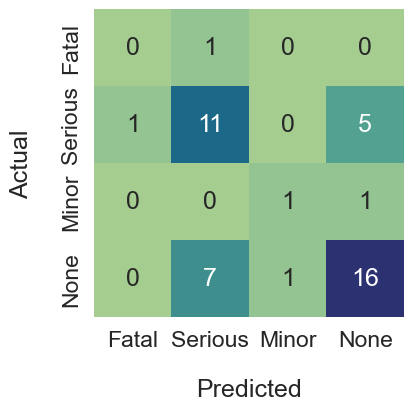

In [31]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.set(font_scale = 1.5)
 
ax = sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cbar=False,
    cmap='crest',
    xticklabels=['Fatal','Serious','Minor','None'],
    yticklabels=['Fatal','Serious','Minor','None']
)
 
ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

Some information on evalutation metrics:

" For datasets with imbalanced classes, a model could achieve high Accuracy by predicting the majority class most of the time

F1 Score is defined as the harmonic mean of Precision and Recall. If any of them becomes extremely low, F1 Score will also go down. Thus, F1 Score can help you find a good balance between Precision and Recall. "

In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    solver='lbfgs',
    class_weight='balanced' # handle imbalanced classes
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("f1_score:",metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.4318181818181818
Precision: 0.3590909090909091
Recall: 0.22794117647058823
f1_score: 0.27884615384615385


### Oli's ML

Oli wanted to continue the exploration of the hypothesis “Reports of US aviation incidents are being published more quickly in recent years, indicating increased scrutiny” by training a model using the delay data from 2015 to 2022 (2023 onwards has too many reports unfiled which would mess with the model). He first wanted to observe how accurately a model can predict against real reports so he trained a Hist Gradient Boosting classifier. To handle unfiled reports, Oli dropped all of them to focus just on classification. Figure 7.1 shows the confusion matrix along with its statistics of each delay category (same ones from figure 5.2). The model struggles with longer delay ranges (721-840 and 840+) where precision and recall values are zero but it performs better in the 121-240 delay category, with a recall of 0.70. However, the overall accuracy of the model is relatively low at 23%, and the macro and weighted averages further highlight the model's weak performance across all classes. The confusion matrix and classification report suggest that the model is having difficulty generalizing to all delay categories, with the majority of the predictions concentrated in a few categories and a significant number of misclassifications especially in the 1-120 range. Despite this poor classification, Oli decided to train a model to predict future report delays. To handle the low minority of unfiled reports in the 7 year time frame, Oli used hot deck imputation for this model. To model the delay, he extracted simple features (such as EventMonth and EventDayOfWeek) and trained a Hist Gradient Boosting Regressor on this data. The model learns patterns in how publishing delays vary across time, and its performance is evaluated using standard regression metrics such as Mean Absolute Error, Mean Squared Error and R^2 score. Once trained, the model is used to simulate future scenarios by generating synthetic aviation events for each month from 2025 to 2035. These synthetic events are passed through the model to predict publishing delays, which are then averaged by year. Based on figure 7.2, the model showed poor predictive power with an r score of just 0.0022 and predicted consistently high average delays, with no meaningful downward trend over time. These results do not support the original hypothesis which means the large increase in media scrutiny in recent years has not been a result of the publication of reports. 


MAE: 259.61 days

RMSE: 326.49 days

R^2: 0.0022


In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


Classification Report (2022–2023 known reports):
              precision    recall  f1-score   support

       1-120       0.28      0.10      0.14       959
     121-240       0.24      0.70      0.36       717
     241-360       0.17      0.07      0.10       261
     361-480       0.09      0.02      0.03       214
     481-600       0.12      0.06      0.08       317
     601-720       0.04      0.03      0.03       194
     721-840       0.00      0.00      0.00       157
        840+       0.00      0.00      0.00         2

    accuracy                           0.23      2821
   macro avg       0.12      0.12      0.09      2821
weighted avg       0.20      0.23      0.16      2821



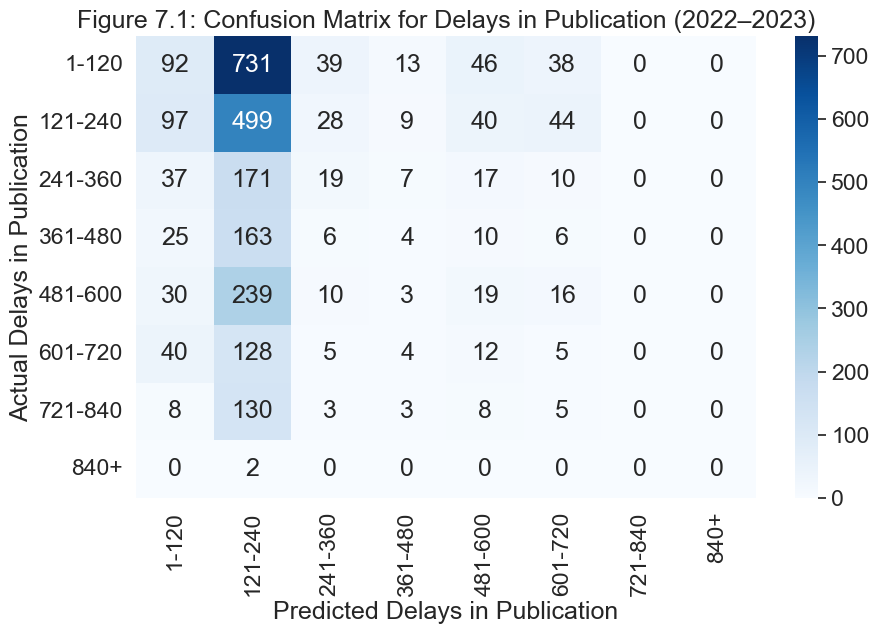

In [34]:
# load and preprocess data (already done from oli_visualizations)
plane_data = pd.read_csv('Merged10yrdata.csv', low_memory=False)
plane_data['EventDate'] = pd.to_datetime(plane_data['EventDate'])
plane_data['OriginalPublishedDate'] = pd.to_datetime(plane_data['OriginalPublishedDate']) # OriginalPublishDate
plane_data = plane_data[plane_data['Country'] == 'United States']
plane_data['ReportDelay'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days

# bin the delay
bins = [-np.inf, 120, 240, 360, 480, 600, 720, 840, np.inf]
labels = ['1-120', '121-240', '241-360', '361-480', '481-600', '601-720', '721-840', '840+']
plane_data['DelayCategory'] = pd.cut(plane_data['ReportDelay'], bins=bins, labels=labels)
plane_data['DelayCategory'] = plane_data['DelayCategory'].cat.add_categories(['Not Filed']).fillna('Not Filed')

# extraction
plane_data['DelayDays'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days
plane_data['EventYear'] = plane_data['EventDate'].dt.year
plane_data['EventMonth'] = plane_data['EventDate'].dt.month
plane_data['EventDayOfWeek'] = plane_data['EventDate'].dt.dayofweek

# encode delay category
le = LabelEncoder()
plane_data['DelayClass'] = le.fit_transform(plane_data['DelayCategory'])

# train on data from 2015–2021
train_df = plane_data[(plane_data['EventYear'] >= 2015) & (plane_data['EventYear'] <= 2021)]
predict_df = plane_data[plane_data['EventYear'] >= 2022]

feature_cols = ['EventYear', 'EventMonth', 'EventDayOfWeek']
X_train = train_df[feature_cols]
y_train = train_df['DelayClass']

# train the model using HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1)
model.fit(X_train, y_train)

# prepare features for prediction data (2023 onwards)
X_predict = predict_df[feature_cols]

# predict classes for the future data
predicted_classes = model.predict(X_predict)
predict_df['PredictedClass'] = predicted_classes
predict_df['PredictedDelayCategory'] = le.inverse_transform(predicted_classes)

# evaluate the model on known data (2022–2023)
eval_df = predict_df[predict_df['DelayCategory'] != 'Not Filed'] 
if not eval_df.empty:
    # encode the true labels using LabelEncoder
    y_true = le.transform(eval_df['DelayCategory'])
    y_pred = eval_df['PredictedClass']
    
    # get the target class names excluding 'Not Filed'
    target_classes = le.classes_
    target_classes = target_classes[target_classes != 'Not Filed']
    
    # print classification report for evaluation
    print("\nClassification Report (2022–2023 known reports):")
    print(classification_report(y_true, y_pred, target_names=target_classes))

    # confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_classes, yticklabels=target_classes, cmap='Blues')
    plt.xlabel("Predicted Delays in Publication")
    plt.ylabel("Actual Delays in Publication")
    plt.title("Figure 7.1: Confusion Matrix for Delays in Publication (2022–2023)")
    plt.show()

# export predictions for future data if needed
# predict_df.to_csv('predicted_report_delays_2022_onward.csv', index=False)

In [35]:
plane_data = pd.read_csv('Merged10yrdata.csv', low_memory=False)

# filter for only US data
plane_data = plane_data[plane_data['Country'] == 'United States']

# convert dates to datetime
plane_data['EventDate'] = pd.to_datetime(plane_data['EventDate'])
plane_data['OriginalPublishedDate'] = pd.to_datetime(plane_data['OriginalPublishedDate'])

# calculate publishing delay in days
plane_data['DelayDays'] = (plane_data['OriginalPublishedDate'] - plane_data['EventDate']).dt.days
plane_data['EventMonth'] = plane_data['EventDate'].dt.month
plane_data['EventDayOfWeek'] = plane_data['EventDate'].dt.dayofweek
plane_data['EventYear'] = plane_data['EventDate'].dt.year

#plane_data.head()

In [36]:
# fill in not filed reports using hot deck imputation
def hot_deck_impute(df):
    df = df.copy()
    group_median = df.groupby(['EventMonth', 'EventDayOfWeek'])['DelayDays'].median()

    def impute(row):
        if pd.isna(row['DelayDays']):
            return group_median.get((row['EventMonth'], row['EventDayOfWeek']), df['DelayDays'].median())
        return row['DelayDays']

    df['DelayDays'] = df.apply(impute, axis=1)
    return df

plane_data = hot_deck_impute(plane_data)

In [37]:
features = ['EventMonth', 'EventDayOfWeek']
X = plane_data[features]
y = plane_data['DelayDays']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train HistGradientBoostingRegressor
model = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# evaluate model
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2:", r2_score(y_test, y_pred))

MAE: 260.7527343536851
RMSE: 328.51987720354697
R^2: 0.010131336016489523


In [38]:
future_years = range(2025, 2036)
future_events = []

for year in future_years:
    for month in range(1, 13):
        # generate 5 events per month (random day)
        for _ in range(5):
            fake_date = pd.Timestamp(f'{year}-{month:02d}-{np.random.randint(1, 28)}')
            future_events.append({
                'EventDate': fake_date,
                'EventMonth': fake_date.month,
                'EventDayOfWeek': fake_date.dayofweek,
            })

synthetic_future_df = pd.DataFrame(future_events)

# feature extraction
def extract_features(df):
    df = df.copy()
    df['EventMonth'] = df['EventDate'].dt.month
    df['EventDayOfWeek'] = df['EventDate'].dt.dayofweek
    return df[['EventMonth', 'EventDayOfWeek']] 

X_future = extract_features(synthetic_future_df)

# predict using trained model
predicted_delays = model.predict(X_future)

# add predictions to the DataFrame
synthetic_future_df['PredictedDelayDays'] = predicted_delays
synthetic_future_df['Year'] = synthetic_future_df['EventDate'].dt.year
synthetic_future_df['Month'] = synthetic_future_df['EventDate'].dt.month

# group by year and calculate the mean delay
mean_delays_per_year = synthetic_future_df.groupby('Year')['PredictedDelayDays'].mean()

#mean_delays_per_year

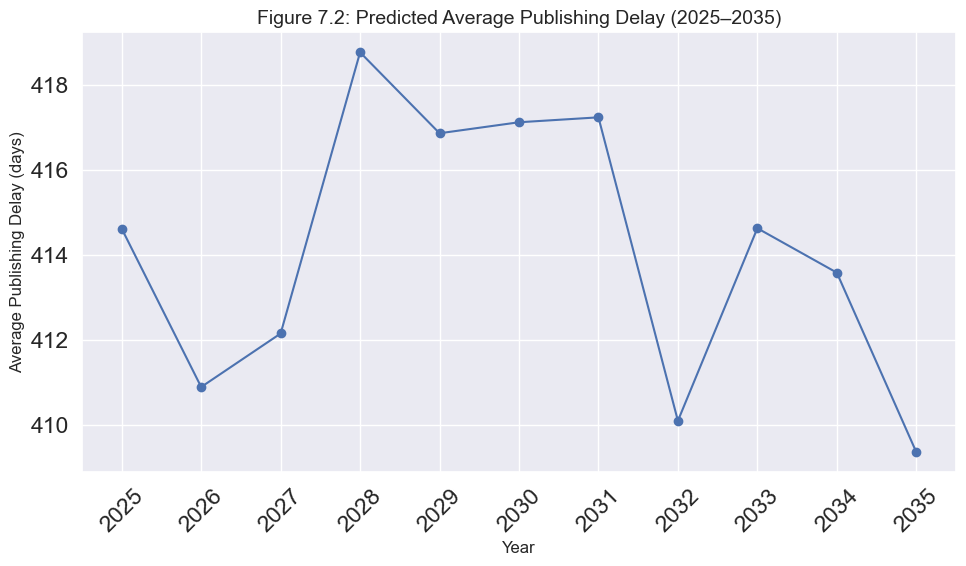

In [39]:
# plot the mean predicted delays per year
plt.figure(figsize=(10, 6))
plt.plot(mean_delays_per_year.index, mean_delays_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Figure 7.2: Predicted Average Publishing Delay (2025–2035)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Publishing Delay (days)', fontsize=12)
plt.grid(True)
plt.xticks(mean_delays_per_year.index, rotation=45)
plt.tight_layout()
plt.show()

### Nav's ML

For my ML analysis, I wanted to understand whether we could sense correlation/causation between cateogires to see how they impact the severity of an airline accident. It's easy to imagine that based on weather patterns in certain parts of the US, the likelihood that a crash there will be more catastrophic. To do this, I chose to do a simple Decision Tree. I filtered for:
- `Make`: The aircraft's manufactures (filtered for aircraft)
- `Longitude and Latitude`: The locations of the aircraft (filtered by `country` to limit accidents to those in the USA)
- `Weather Condition`: The severity of the weathter at the time of the accident
I then aimed to predict the `AirCraftDamage` column, which classified damage as either <b>minor</b> or <b>substatntial</b>.

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import numpy as np

## Choosing the Columns to Focus on
- I'll be choosing the following columns as predictors: `Make`, `Longitude`, `Latitude`, and `WeatherCondition`
- I'll be choosing the following column to predict: `AircraftDamage`

In [41]:
df = pd.read_csv("Merged10yrdata.csv", low_memory=False)
df.columns = df.columns.str.strip()  

df = df[df['Country'] == 'United States']

df = df[['Make', 'Longitude', 'Latitude', 'WeatherCondition', 'AirCraftDamage']]

df = df[df['Make'].isin([
    'BOEING', 'Airbus', 'Boeing', 'AIRBUS', 
    'AIRBUS INDUSTRIE', 'BOEING, AIRBUS', 'AIRBUS SAS'
])]
df

Make   Longitude   Latitude WeatherCondition AirCraftDamage
12     BOEING -116.550003  32.868331              VMC            NaN
19     BOEING  -80.821388  35.285831              IMC            NaN
34     BOEING -122.313331  47.463611              VMC            NaN
41     BOEING  -86.599998  36.099998              VMC    Substantial
65     AIRBUS -111.281387  47.493610              IMC            NaN
...       ...         ...        ...              ...            ...
16258  BOEING         NaN        NaN              VMC            NaN
16296  BOEING         NaN        NaN              NaN            NaN
16391  BOEING         NaN        NaN              NaN            NaN
16392  BOEING         NaN        NaN              NaN            NaN
16402  BOEING         NaN        NaN              NaN            NaN

[325 rows x 5 columns]

## Data Prepping, Clearing, and Filtering

In [42]:
df['AirCraftDamage'].unique()

array([nan, 'Substantial', 'Minor', 'Destroyed',
       'Substantial, Substantial', 'Minor, Substantial', 'None, None',
       'Unknown'], dtype=object)

In [43]:
print(df['AirCraftDamage'].value_counts())

AirCraftDamage
Substantial                 129
Minor                        32
Destroyed                     5
Substantial, Substantial      1
Minor, Substantial            1
None, None                    1
Unknown                       1
Name: count, dtype: int64


In [44]:
df = df[df["AirCraftDamage"].isin(
    ['Substantial', 'Minor', 'Destroyed']
)] # Removing unknown and nones

df = df[df["WeatherCondition"].isin(['VMC', 'IMC'])] # Removing Unknown and None

df

Make   Longitude   Latitude WeatherCondition AirCraftDamage
41     BOEING  -86.599998  36.099998              VMC    Substantial
133    AIRBUS -117.190551  34.599166              VMC    Substantial
209    BOEING  -80.146667  26.074722              VMC    Substantial
213    AIRBUS -148.642501  69.785835              IMC    Substantial
445    AIRBUS -111.754997  40.526390              VMC    Substantial
...       ...         ...        ...              ...            ...
16052  BOEING -122.381600  37.619300              VMC    Substantial
16108  BOEING  -97.038002  32.896801              VMC          Minor
16186  BOEING  -80.314838  25.786095              VMC          Minor
16212  BOEING  -95.341600  29.993100              VMC    Substantial
16228  BOEING -122.755550  45.454167              VMC    Substantial

[148 rows x 5 columns]

## ML Analysis - Decision Tree
Now that the data has been cleaned, we run an analysis

In [45]:
from sklearn import tree
from sklearn.model_selection import train_test_split

my_tree = tree.DecisionTreeClassifier()

X = df[['Make', 'Longitude', 'Latitude', 'WeatherCondition']]
y = df['AirCraftDamage']

X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

my_tree.fit(X_train, y_train)

DecisionTreeClassifier()

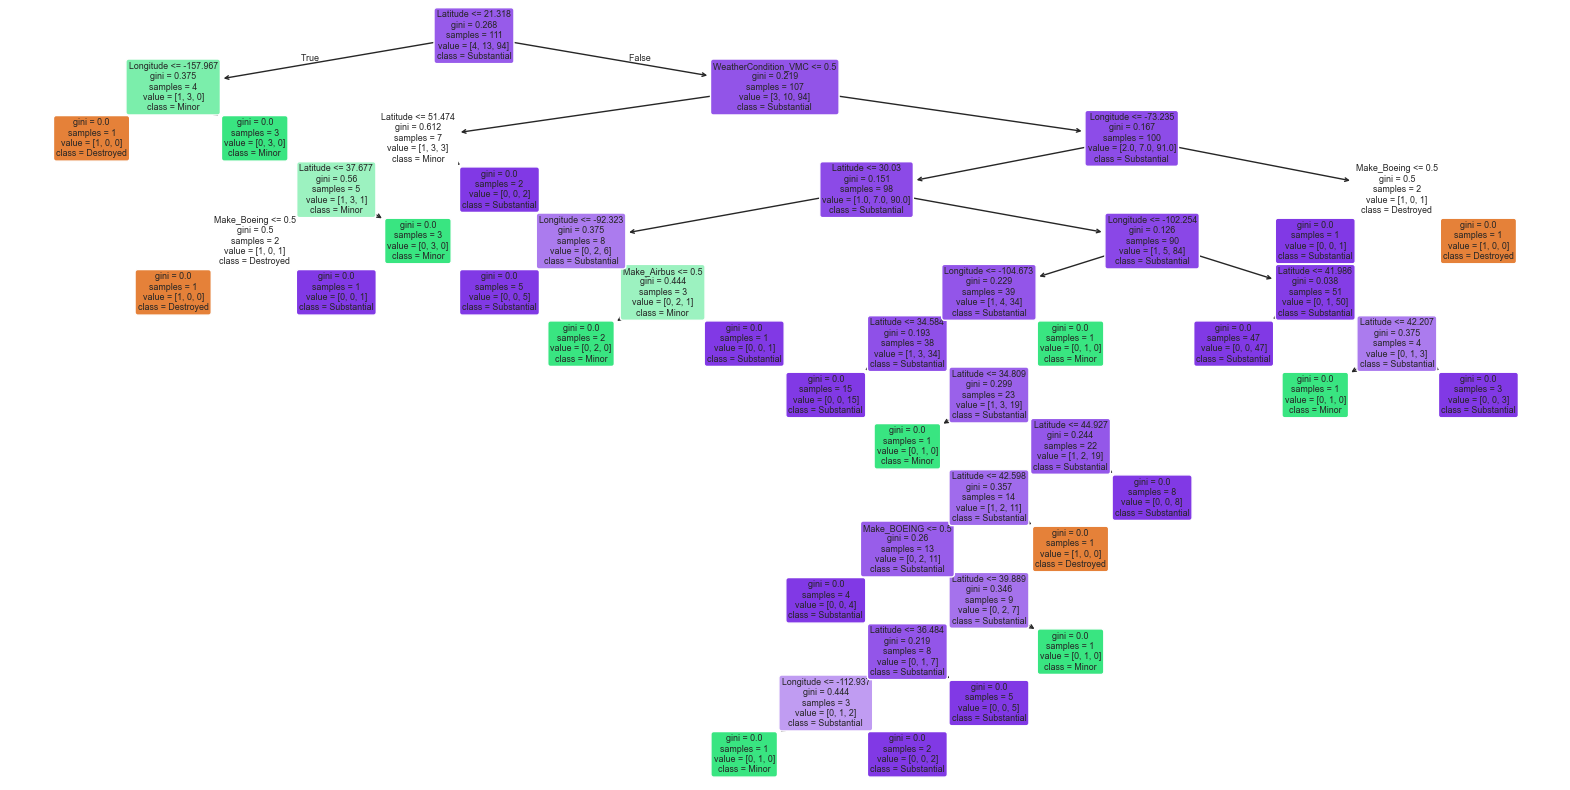

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

plot_tree(
    my_tree,
    feature_names=X.columns,           
    class_names=my_tree.classes_,      
    filled=True,                       
    rounded=True                       
)

plt.show()


In [47]:
from sklearn.metrics import classification_report

# Predict only on the test set
y_pred = my_tree.predict(X_test)

# Now compare the same-sized arrays
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   Destroyed       0.00      0.00      0.00         1
       Minor       0.33      0.20      0.25         5
 Substantial       0.84      0.84      0.84        31

    accuracy                           0.73        37
   macro avg       0.39      0.35      0.36        37
weighted avg       0.75      0.73      0.74        37



## Reflection 

The most challenging part of our project that we have encountered so far is understanding what we can actually do with all the data we have. It is excellent that there is so much data regarding the incidents, however we quickly learned that understanding the factors behind these incidents is not black and white. We also didn’t consider the aspect of the flights that occur on a day-to-day basis that do not result in incidents and we learned that gathering that data would be a far greater task than we had originally anticipated. 

We believe we are generally on track with our project, especially in terms of collecting and analyzing data related to flight incidents. Most of our work so far has focused on investigating patterns in aviation accidents using datasets from the NTSB and FAA. However, we’ve realized that we haven't spent as much time exploring the media attention side of our research question.

To fully address whether the rise in concern is due to actual increases in incidents or increased scrutiny, we need to dedicate more time to analyzing trends in media coverage. This could include looking at the frequency and tone of news articles, social media posts, and public reactions over time. Integrating this data will help us better understand the relationship between real-world events and public perception.

However, this proves to be one of the biggest challenges we are currently facing is compiling and analyzing data related to the frequency and tone of news articles and public reactions. Unlike aviation incident data, which is already structured and readily available, media coverage is more difficult to quantify. Tracking how often incidents are reported, identifying which stories gain traction, and assessing the tone or framing of articles would require sifting through extremely large amounts of text. Especially, in today’s age where almost everyone is receiving their information through social media such as TikTok which has millions of videos being posted daily, the sheer volume of content makes this difficult. And with the heavy impact of AI and fear mongering on social media, we are unable to determine how much of what we are seeing is real or not regarding what we are actually seeing. 

Going forward, we need to determine if there is a manageable way to incorporate media data, or if our research question and scope needs to be modified. We would also like to further our understanding by incorporating further statistical analyses and better machine learning analyses. 

The hypothesis “Reports of US aviation incidents are being published more quickly in recent years, indicating increased scrutiny” (using the data points of report publication and event date) was rejected by both the visualization and machine learning model. We will need to find other variables in our dataset that might correlate to our main idea.